In [1]:
%load_ext autoreload
%autoreload 2

In [180]:
from network.examples import community, virus

import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib inline

In [145]:
n_communities = 500
community_size = 3
orphans = 500

total_ppl = n_communities * community_size + orphans

In [146]:
# assume 3 strong connections per person
n_strong_conns = total_ppl * 3
# assume 6 weak connections per person
n_weak_conns = total_ppl * 6

In [147]:
strengths = {
    'core': 0.8,
    'strong': 0.75,
    'weak': 0.1
}

In [148]:
graph, node_community_map = community.community_graph(
    n_communities, community_size, orphans,
    n_strong_conns, n_weak_conns, strengths
)

In [197]:
sim = virus.virus_simulation(
    graph=graph,
    patient0=1,
    incubation_period=5,
    contagious_for=0,
    strengths=strengths
)

In [198]:
drawer = community.community_drawer(
    graph, node_community_map, rfactor=1.2, sparseness=1.5
)

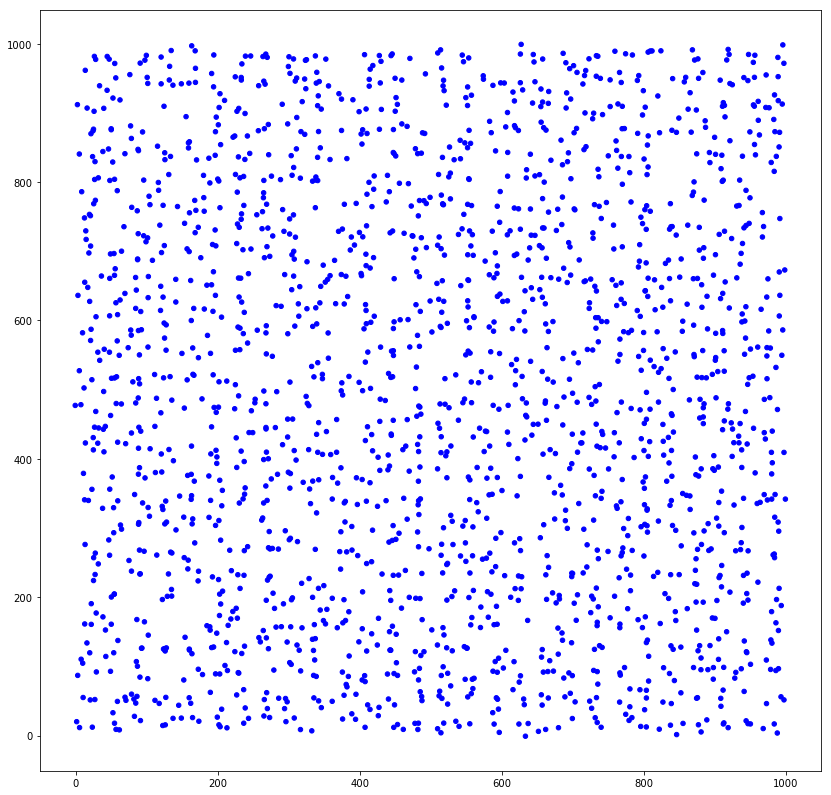

In [199]:
fig = plt.figure(figsize=(14, 14))
drawer.draw(1, arrows=False, s=20)

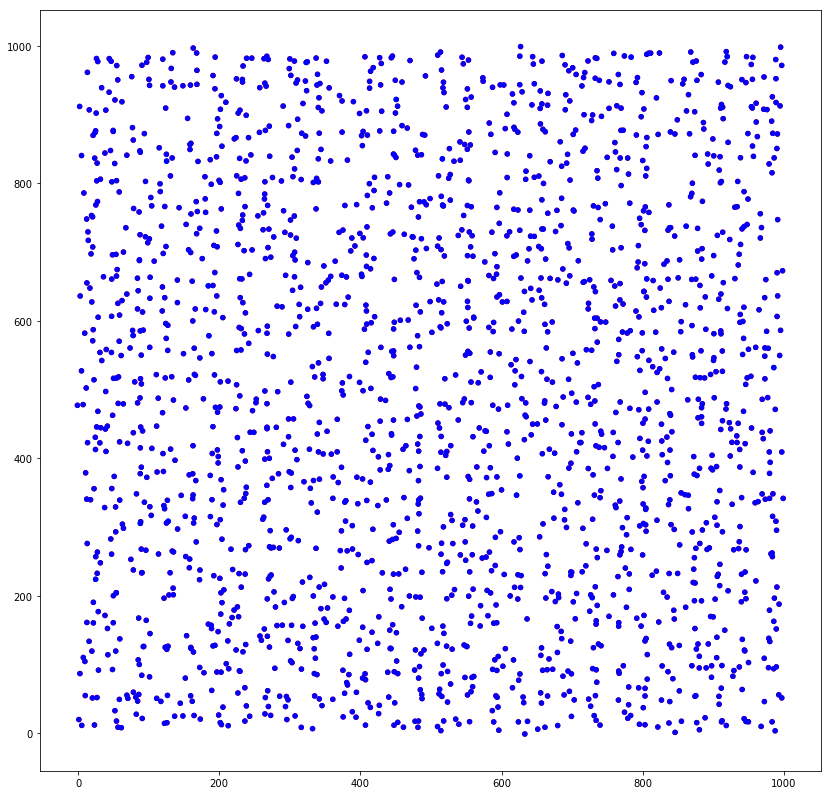

In [200]:
plt.rcParams['animation.html'] = 'jshtml'
plt.figure(figsize=(14, 14))
drawer.animate(sim, every=2, max_frames=50, arrows=False, s=20)

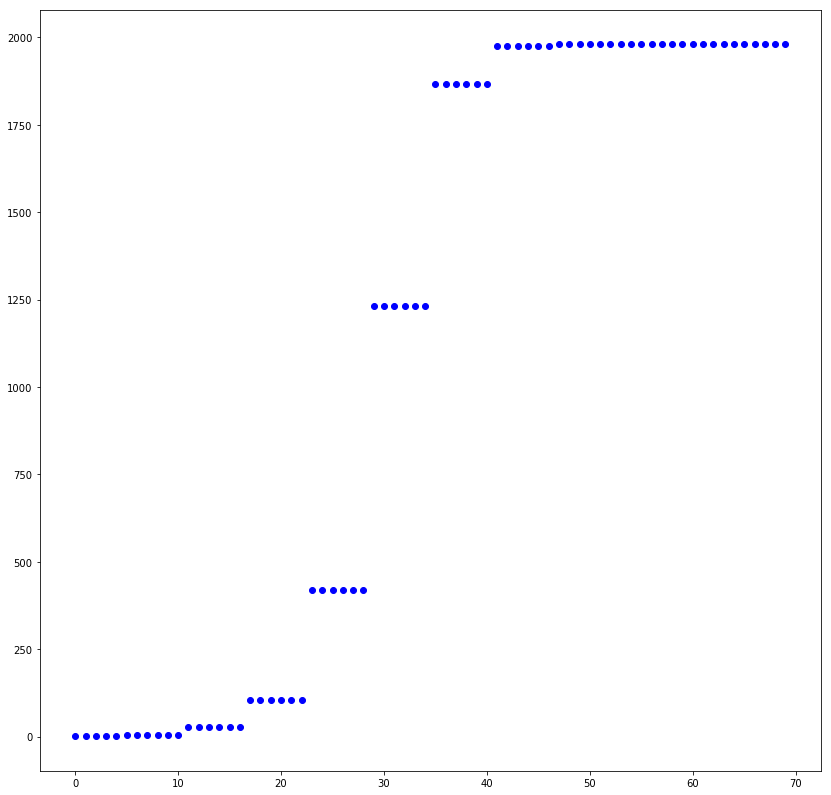

In [216]:
def sim_sequence(n):
    for i in range(n):
        sim.path(i)
        if i < len(sim.history):
            hist = sim.history[i]
        else:
            hist = sim.history[-1]
        yield hist['broadcasts']

plt.figure(figsize=(14, 14))
plt.plot(range(70), list(sim_sequence(70)), 'bo')